In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
# import graphviz
path = 'C:\\Users\\perco\\Desktop\\股票数据\\DF.pkl.zip'
D_cut = '2023-01-01'
T0 = '2018-01-01'
T1 = '2024-01-09'

In [2]:
DF = pd.read_pickle(path)
DF = DF[(DF['Date']>=T0) & (DF['Date']<=T1)]
DF = DF[DF['W_0']==1]

DF.sort_values(by=['Date','Code'], inplace=True)
DF.reset_index(drop=True, inplace=True)

for i in DF.columns[6:]:
    DF[i] = DF[i].astype('float32')
    
DF

,Date,Code,C1C2,V1V2,W_0,W_1,OPENF,HIGHF,LOWF,CLOSEF,VWAPF,TVOL,TVAL,AGSZHXS,CHG,TURNRATE
0,2018-01-02,SH600000,0.000000,-0.341949,1,1,118.354080,119.855797,118.260223,119.386513,119.442162,31323052.0,398614976.0,3.733585e+11,1.0326,0.110000
1,2018-01-02,SH600004,-1.216216,-0.808459,1,1,31.115370,31.368856,30.819637,31.263237,31.136990,13127900.0,193508320.0,3.062594e+10,0.6803,0.630000
2,2018-01-02,SH600006,-1.015228,-0.848045,1,1,15.526830,15.712304,15.447341,15.659311,15.562122,10649302.0,62546756.0,1.182000e+10,1.0256,0.530000
3,2018-01-02,SH600007,0.058858,-0.178910,1,1,23.025480,23.092571,22.864464,22.971807,22.967850,690533.0,11819888.0,1.724468e+10,-0.1167,0.070000
4,2018-01-02,SH600008,1.573427,6.111651,1,1,28.978722,29.372606,28.866182,29.260067,29.135157,35174412.0,182126128.0,2.506719e+10,1.1673,0.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547885,2024-01-09,SZ301448,2.544088,1.303422,1,1,36.286022,37.441948,33.672626,34.064636,35.529461,4489200.0,158681168.0,2.711200e+09,-7.4044,22.445999
5547886,2024-01-09,SZ301456,1.497769,0.021280,1,1,29.849142,34.885872,29.849142,32.307304,32.712147,5753191.0,187574128.0,4.784412e+09,8.2353,16.631001
5547887,2024-01-09,SZ301486,1.228324,0.398649,1,1,43.099998,44.259998,42.110001,42.730000,43.098686,2773213.0,119521840.0,5.498539e+09,-0.7203,8.620000
5547888,2024-01-09,SZ301488,2.321541,1.216640,1,1,66.092018,67.461800,65.235901,65.719360,66.413605,1002293.0,66090488.0,6.003000e+09,-0.7605,4.741000


In [3]:
DF['F_1'] = (DF['HIGHF']-DF['LOWF']) / DF['CLOSEF']
DF['F_2'] = DF['AGSZHXS'] / DF['CHG']
DF['F_3'] = DF.groupby('Date')['CHG'].transform(lambda x: x.rank(pct=True))
DF['F_4'] = DF['F_3'] / DF.groupby('Date')['TURNRATE'].transform(lambda x: x.rank(pct=True))



In [4]:
DF['Y'] = DF.groupby('Date')['V1V2'].transform(lambda x: x.rank(pct=True))

DF['Y+'] = (DF['Y']>0.6).astype(int)
DF['Y-'] = (DF['Y']<0.4).astype(int)

DF.drop('Y', axis=True, inplace=True)


#DF['Y+'] = (DF['V1V2']>3).astype(int)
#DF['Y-'] = (DF['V1V2']<-3).astype(int)


DF

,Date,Code,C1C2,V1V2,W_0,W_1,OPENF,HIGHF,LOWF,CLOSEF,...,TVAL,AGSZHXS,CHG,TURNRATE,F_1,F_2,F_3,F_4,Y+,Y-
0,2018-01-02,SH600000,0.000000,-0.341949,1,1,118.354080,119.855797,118.260223,119.386513,...,398614976.0,3.733585e+11,1.0326,0.110000,0.013365,3.615712e+11,0.616722,94.564103,0,1
1,2018-01-02,SH600004,-1.216216,-0.808459,1,1,31.115370,31.368856,30.819637,31.263237,...,193508320.0,3.062594e+10,0.6803,0.630000,0.017568,4.501829e+10,0.476087,1.492138,0,1
2,2018-01-02,SH600006,-1.015228,-0.848045,1,1,15.526830,15.712304,15.447341,15.659311,...,62546756.0,1.182000e+10,1.0256,0.530000,0.016920,1.152496e+10,0.614381,2.426684,0,1
3,2018-01-02,SH600007,0.058858,-0.178910,1,1,23.025480,23.092571,22.864464,22.971807,...,11819888.0,1.724468e+10,-0.1167,0.070000,0.009930,-1.477693e+11,0.181940,83.692308,0,1
4,2018-01-02,SH600008,1.573427,6.111651,1,1,28.978722,29.372606,28.866182,29.260067,...,182126128.0,2.506719e+10,1.1673,0.730000,0.017308,2.147451e+10,0.661371,1.714348,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547885,2024-01-09,SZ301448,2.544088,1.303422,1,1,36.286022,37.441948,33.672626,34.064636,...,158681168.0,2.711200e+09,-7.4044,22.445999,0.110652,-3.661607e+08,0.002900,0.002921,1,0
5547886,2024-01-09,SZ301456,1.497769,0.021280,1,1,29.849142,34.885872,29.849142,32.307304,...,187574128.0,4.784412e+09,8.2353,16.631001,0.155901,5.809638e+08,0.998550,1.011542,0,1
5547887,2024-01-09,SZ301486,1.228324,0.398649,1,1,43.099998,44.259998,42.110001,42.730000,...,119521840.0,5.498539e+09,-0.7203,8.620000,0.050316,-7.633679e+09,0.146571,0.152380,0,0
5547888,2024-01-09,SZ301488,2.321541,1.216640,1,1,66.092018,67.461800,65.235901,65.719360,...,66090488.0,6.003000e+09,-0.7605,4.741000,0.033870,-7.893491e+09,0.139735,0.153890,1,0


In [5]:
I_cut = DF[DF['Date']>=D_cut].index.min()
print(DF.loc[I_cut,['Date', 'Code']].values)


M_L = lgb.LGBMClassifier(objective='binary',
                       n_estimators = 4,
                       max_depth = 7,
                       num_leaves = 25,
                       min_child_samples = (I_cut-1)//2048,
                       reg_lambda = 1,
                       reg_alpha = 1)

M_S = lgb.LGBMClassifier(objective='binary',
                       n_estimators = 4,
                       max_depth = 7,
                       num_leaves = 25,
                       min_child_samples = (I_cut-1)//2048,
                       reg_lambda = 1,
                       reg_alpha = 1)


M_L.fit(DF.iloc[:I_cut, 6:-2],
        DF.loc[:I_cut-1, 'Y+'])

M_S.fit(DF.iloc[:I_cut, 6:-2],
        DF.loc[:I_cut-1, 'Y-'])

[Timestamp('2023-01-03 00:00:00') 'SH600000']
[LightGBM] [Info] Number of positive: 1755870, number of negative: 2632549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.206125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 4388419, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400114 -> initscore=-0.404988
[LightGBM] [Info] Start training from score -0.404988
[LightGBM] [Info] Number of positive: 1754656, number of negative: 2633763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.193976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 4388419, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399838 -> initscore=-0.406141
[LightGB

LGBMClassifier(max_depth=7, min_child_samples=2142, n_estimators=4,
               num_leaves=25, objective='binary', reg_alpha=1, reg_lambda=1)

In [6]:
DF['Y+'] = M_L.predict_proba(DF[DF.columns[6:-2]]).T[1]
DF['Y-'] = M_S.predict_proba(DF[DF.columns[6:-2]]).T[1]
DF

,Date,Code,C1C2,V1V2,W_0,W_1,OPENF,HIGHF,LOWF,CLOSEF,...,TVAL,AGSZHXS,CHG,TURNRATE,F_1,F_2,F_3,F_4,Y+,Y-
0,2018-01-02,SH600000,0.000000,-0.341949,1,1,118.354080,119.855797,118.260223,119.386513,...,398614976.0,3.733585e+11,1.0326,0.110000,0.013365,3.615712e+11,0.616722,94.564103,0.408590,0.382791
1,2018-01-02,SH600004,-1.216216,-0.808459,1,1,31.115370,31.368856,30.819637,31.263237,...,193508320.0,3.062594e+10,0.6803,0.630000,0.017568,4.501829e+10,0.476087,1.492138,0.397731,0.389099
2,2018-01-02,SH600006,-1.015228,-0.848045,1,1,15.526830,15.712304,15.447341,15.659311,...,62546756.0,1.182000e+10,1.0256,0.530000,0.016920,1.152496e+10,0.614381,2.426684,0.394660,0.386271
3,2018-01-02,SH600007,0.058858,-0.178910,1,1,23.025480,23.092571,22.864464,22.971807,...,11819888.0,1.724468e+10,-0.1167,0.070000,0.009930,-1.477693e+11,0.181940,83.692308,0.396424,0.361598
4,2018-01-02,SH600008,1.573427,6.111651,1,1,28.978722,29.372606,28.866182,29.260067,...,182126128.0,2.506719e+10,1.1673,0.730000,0.017308,2.147451e+10,0.661371,1.714348,0.397731,0.386271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547885,2024-01-09,SZ301448,2.544088,1.303422,1,1,36.286022,37.441948,33.672626,34.064636,...,158681168.0,2.711200e+09,-7.4044,22.445999,0.110652,-3.661607e+08,0.002900,0.002921,0.405529,0.453492
5547886,2024-01-09,SZ301456,1.497769,0.021280,1,1,29.849142,34.885872,29.849142,32.307304,...,187574128.0,4.784412e+09,8.2353,16.631001,0.155901,5.809638e+08,0.998550,1.011542,0.400414,0.443115
5547887,2024-01-09,SZ301486,1.228324,0.398649,1,1,43.099998,44.259998,42.110001,42.730000,...,119521840.0,5.498539e+09,-0.7203,8.620000,0.050316,-7.633679e+09,0.146571,0.152380,0.405529,0.429989
5547888,2024-01-09,SZ301488,2.321541,1.216640,1,1,66.092018,67.461800,65.235901,65.719360,...,66090488.0,6.003000e+09,-0.7605,4.741000,0.033870,-7.893491e+09,0.139735,0.153890,0.403082,0.409971


In [7]:
I_cut = DF[DF['Date']>=D_cut].index.min()
print(DF.loc[I_cut,['Date', 'Code']].values)



M = lgb.LGBMRegressor(objective='regression',
                      max_bins = 512,
                      n_estimators = 8,
                      max_depth = 7,
                      num_leaves = 25,
                      min_child_samples = (I_cut-1)//2048,
                      reg_lambda = 1,
                      reg_alpha = 1)


M.fit(DF.iloc[:I_cut, 6:], 
      DF.loc[:I_cut-1,'V1V2'],
      sample_weight = DF.loc[:I_cut-1,'W_1'],)

[Timestamp('2023-01-03 00:00:00') 'SH600000']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.272545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8080
[LightGBM] [Info] Number of data points in the train set: 4388419, number of used features: 16
[LightGBM] [Info] Start training from score 0.024870


LGBMRegressor(max_bins=512, max_depth=7, min_child_samples=2142, n_estimators=8,
              num_leaves=25, objective='regression', reg_alpha=1, reg_lambda=1)

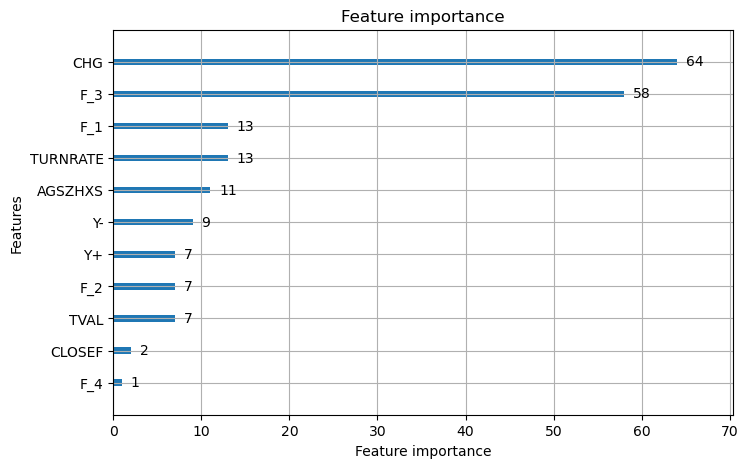

In [8]:
lgb.plot_importance(M, max_num_features=20, figsize=(8, 5))
plt.show()

In [9]:
df = DF[DF['W_1']==1][['Date','Code','V1V2']]

df['Pred'] = M.predict(DF[DF['W_1']==1].iloc[:,6:])

df.head(3)

,Date,Code,V1V2,Pred
0,2018-01-02,SH600000,-0.341949,0.001495
1,2018-01-02,SH600004,-0.808459,0.001495
2,2018-01-02,SH600006,-0.848045,0.001495


In [10]:
G_0 = [i[1] for i in df.groupby('Date')]
G_1 = []
for g in G_0:
    g['Rank'] = g['Pred'].rank(method='max')
    g['Group'] = 0
    L = len(g) * 0.90
    g.loc[g['Rank']>=L, 'Group'] = 1
    G_1.append(g)
    
df = pd.concat(G_1).reset_index(drop=True)
df.head(3)

,Date,Code,V1V2,Pred,Rank,Group
0,2018-01-02,SH600000,-0.341949,0.001495,1080.0,0
1,2018-01-02,SH600004,-0.808459,0.001495,1080.0,0
2,2018-01-02,SH600006,-0.848045,0.001495,1080.0,0


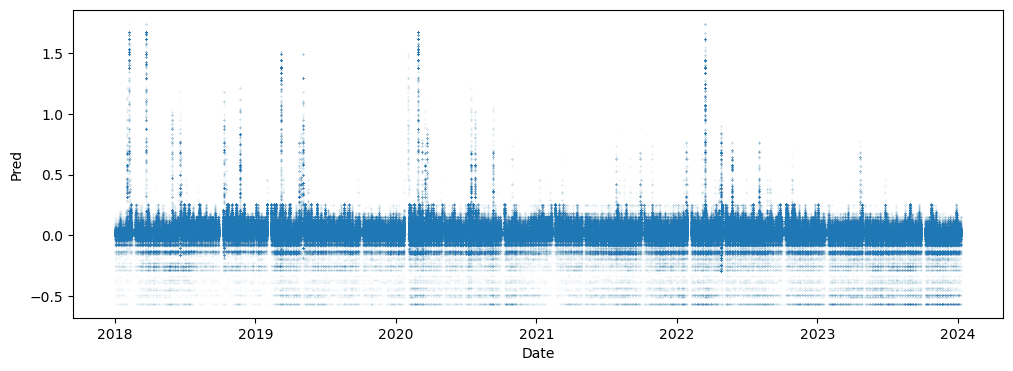

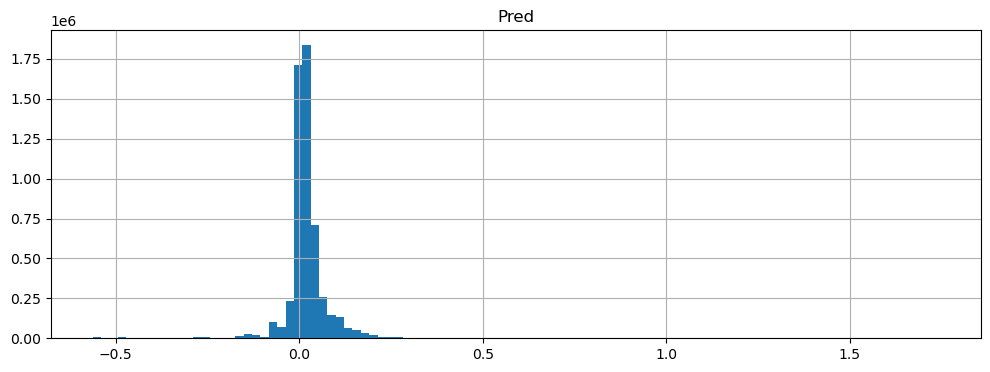

In [11]:
df.plot.scatter(x='Date', y='Pred', figsize=(12,4), s=0.05, alpha=0.05)
plt.show()

df.hist('Pred', bins=101, figsize=(12,4))
plt.show()

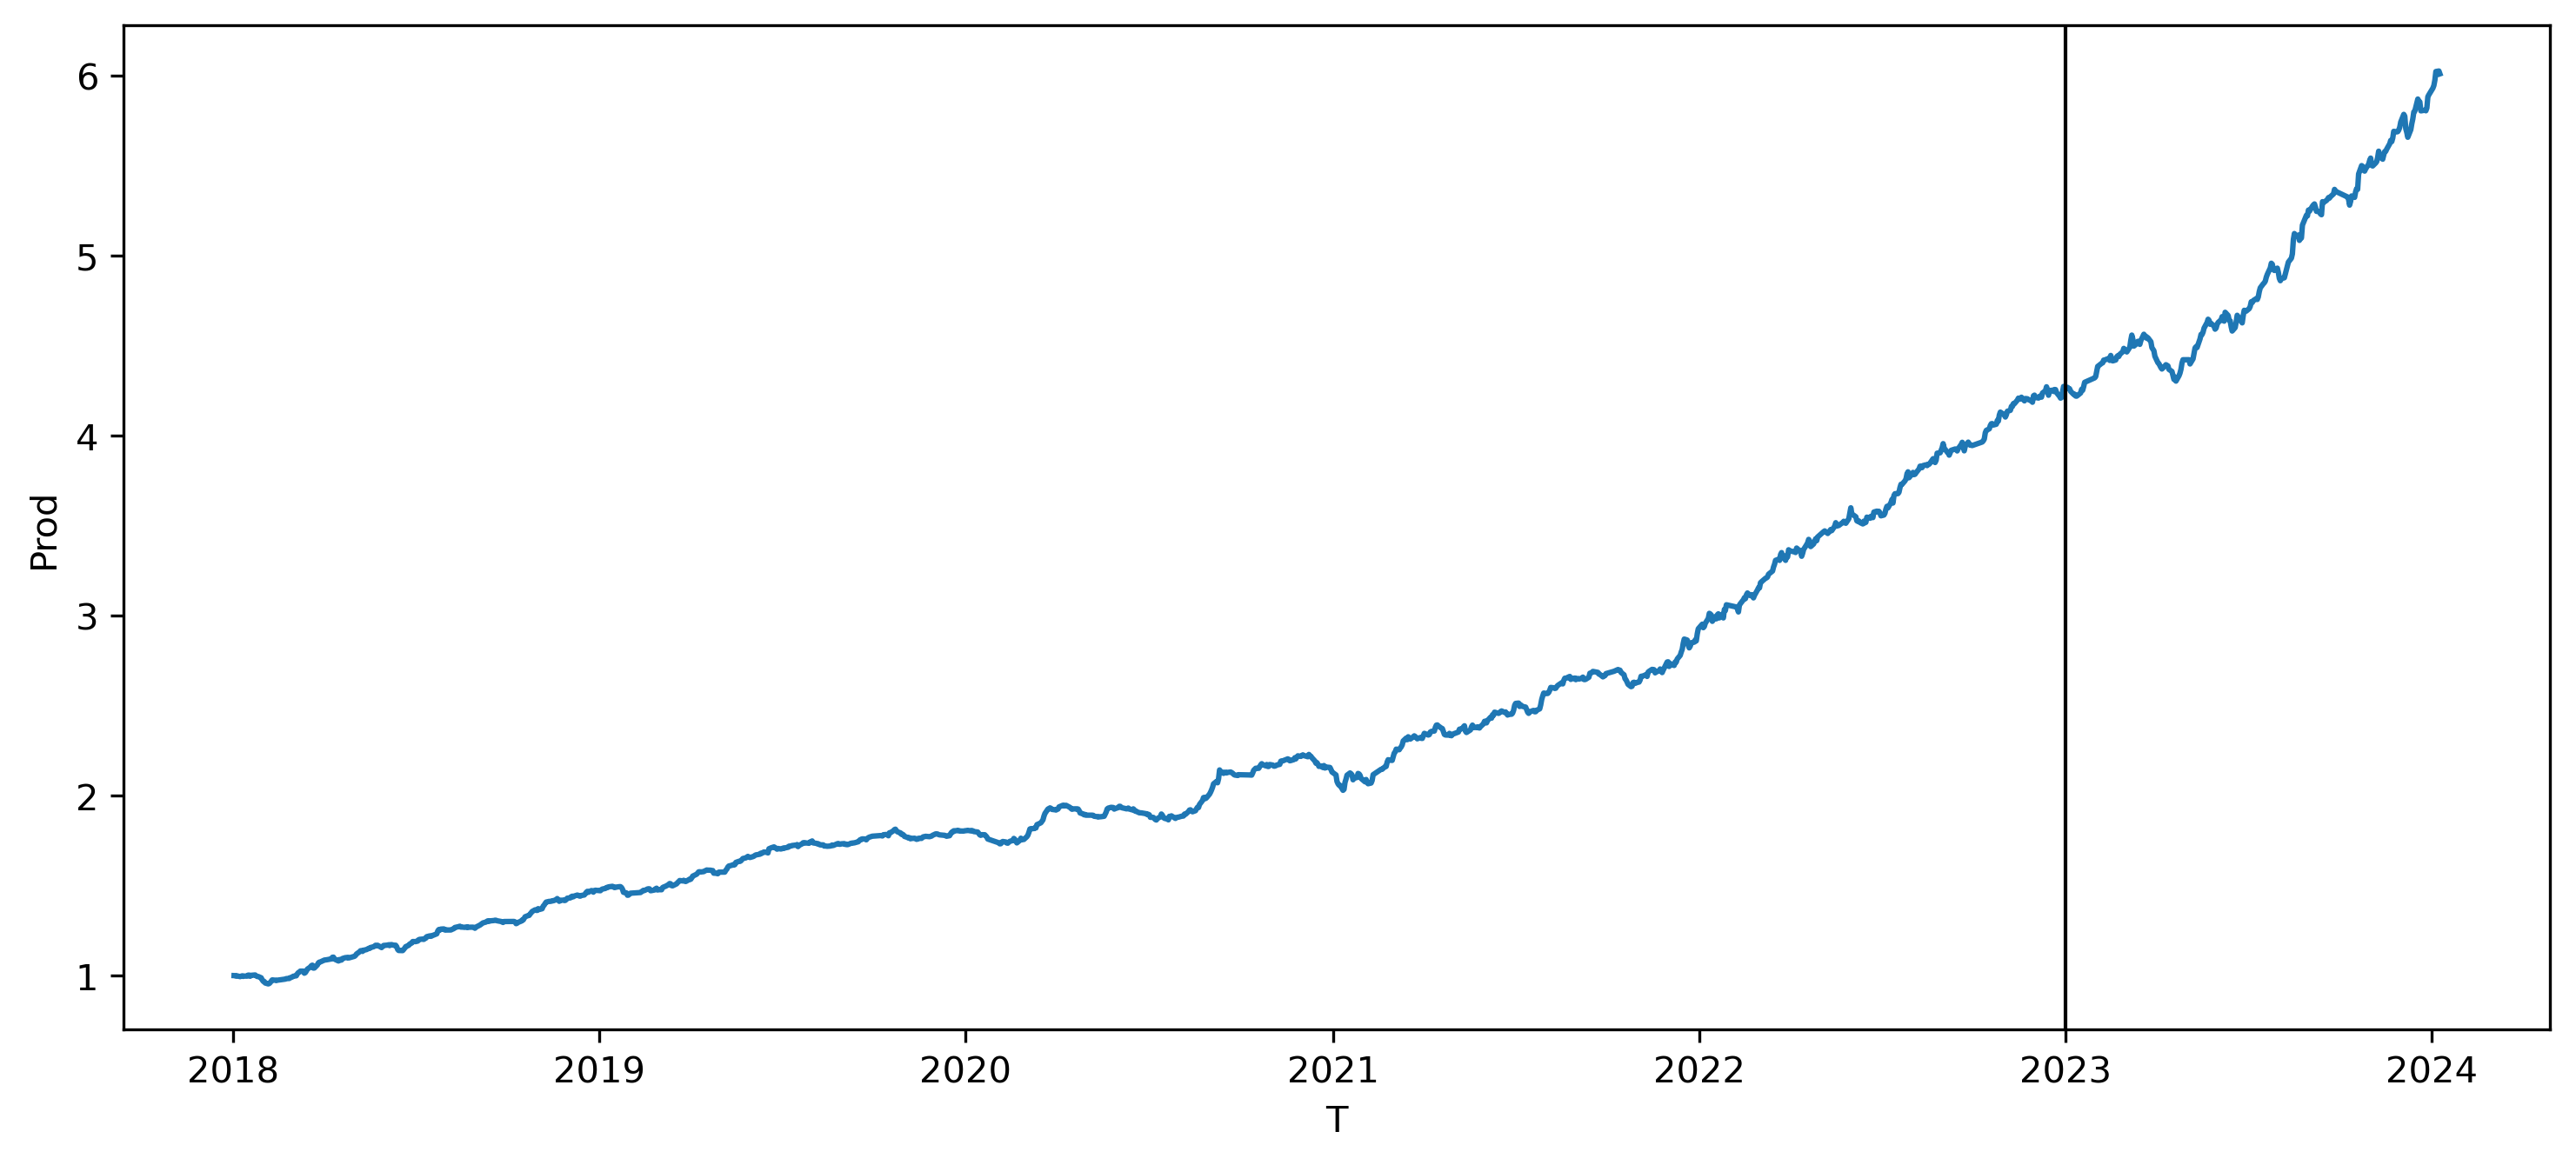

In
Ann_R: 34.808 %
Max_D: 8.943 %
Sharp: 4.284
Calma: 3.892

Out
Ann_R: 41.2 %
Max_D: 5.706 %
Sharp: 4.801
Calma: 7.22



In [12]:
G = df.groupby(['Date', 'Group'])['V1V2'].mean().unstack()
G['D'] = G[1] - G[0]
G['A'] = G['D'] * 0.01 + 1
G['A'] = G['A'].cumprod()

plt.figure(figsize=(12, 5), dpi=300)
plt.plot(G.index, G['A'], lw=1.5)
plt.xlabel('T')
plt.ylabel('Prod')
plt.axvline(pd.Timestamp(D_cut), color='black', lw=1)
# plt.yscale('log')
plt.show()

G_ = G[G.index<D_cut]
AR = (np.power((G_['A'].iloc[-1] / G_['A'].iloc[0]), (250/ len(G_))) - 1) * 100
MD = ((G_['A'].cummax()-G_['A']) / G_['A'].cummax()).max() * 100
SP = G_['D'].mean() / G_['D'].std() * np.sqrt(250)
CM = AR / MD
print('In')
print('Ann_R:', round(AR,3), '%')
print('Max_D:', round(MD,3), '%')
print('Sharp:', round(SP,3))
print('Calma:', round(CM,3))
print()

G_ = G[G.index>=D_cut]
AR = (np.power((G_['A'].iloc[-1] / G_['A'].iloc[0]), (250/ len(G_))) - 1) * 100
MD = ((G_['A'].cummax()-G_['A']) / G_['A'].cummax()).max() * 100
SP = G_['D'].mean() / G_['D'].std() * np.sqrt(250)
CM = AR / MD
print('Out')
print('Ann_R:', round(AR,3), '%')
print('Max_D:', round(MD,3), '%')
print('Sharp:', round(SP,3))
print('Calma:', round(CM,3))
print()

In [13]:
# In
# Ann_R: 33.172 %
# Max_D: 10.154 %
# Sharp: 4.061
# Calma: 3.267

# Out
# Ann_R: 42.404 %
# Max_D: 6.073 %
# Sharp: 4.804
# Calma: 6.982